In [101]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from cartopy.io.shapereader import Reader
import cartopy.crs as ccrs

%matplotlib inline

In [64]:
#median home value
mhv = pd.read_csv('data/processed/median_home_value.csv', index_col=0)
#median income
mi = pd.read_csv('data/processed/median_income.csv', index_col=0)
#education attained - this csv has multiindexed columns
ea = pd.read_csv('data/processed/education_attained.csv', index_col=0, header=[0, 1])

In [65]:
ea_score = pd.DataFrame(index=ea.index, columns=ea.columns.levels[0])
scorer = np.array([1, 2, 3, 4, 5, 6, 7])
for col in ea_score.columns:
    ea_score[col] = np.dot(ea[col], scorer)
ea_score.head()

,2011,2012,2013,2014,2015,2016
78610,424.8,431.3,427.0,429.4,441.4,441.4
78613,483.1,486.8,488.7,492.3,490.1,490.1
78617,310.2,308.0,316.2,311.1,307.3,307.3
78641,431.0,433.1,434.4,433.3,455.5,455.5
78652,462.2,450.4,462.2,457.4,451.8,451.8


In [73]:
mmsc = MinMaxScaler(feature_range=(-1, 1))

mhv_scaled = pd.DataFrame(mmsc.fit_transform(mhv), index=mhv.index, columns=mhv.columns)
mi_scaled = pd.DataFrame(mmsc.fit_transform(mi), index=mi.index, columns=mi.columns)
ea_scaled = pd.DataFrame(mmsc.fit_transform(ea_score), index=ea_score.index, columns=ea_score.columns)

In [74]:
print(mhv_scaled.head())
print(mi_scaled.head())
print(ea_scaled.head())

           2011      2012      2013      2014      2015      2016
78610 -0.510413 -0.544670 -0.612370 -0.675160 -0.637363 -0.617594
78613 -0.475821 -0.505551 -0.554384 -0.587046 -0.543799 -0.535907
78617 -0.792799 -0.837181 -0.903005 -0.962190 -0.912716 -0.895272
78641 -0.601836 -0.644053 -0.701986 -0.751110 -0.701099 -0.684321
78652 -0.481115 -0.505551 -0.581444 -0.654776 -0.622292 -0.593357
           2011      2012      2013      2014      2015      2016
78610  0.173588  0.236847  0.123781  0.052081  0.025996 -0.009387
78613  0.158950  0.187766  0.172138  0.198504  0.196915  0.239127
78617 -0.462476 -0.446675 -0.444559 -0.450589 -0.442597 -0.454448
78641 -0.075397 -0.092903  0.003452  0.034792  0.072466  0.119384
78652  0.113990  0.140982  0.082714 -0.010638  0.008483  0.040715
           2011      2012      2013      2014      2015      2016
78610 -0.072066 -0.145374 -0.132423 -0.113032 -0.003092 -0.003092
78613  0.299745  0.230769  0.259447  0.289785  0.298083  0.298083
78617 -0.8

In [76]:
gent_score = mhv_scaled + mi_scaled + ea_scaled

In [77]:
gent_score['2016'] - gent_score['2011']

78610   -0.221182
78613    0.018430
78617   -0.123918
78641    0.228928
78652   -0.290747
78653   -0.062666
78660   -0.012191
78664   -0.168746
78681   -0.066139
78701    0.730334
78702    0.483528
78703    0.066600
78704    0.305106
78705    0.079347
78717    0.005939
78719   -0.517830
78721    0.301511
78722    0.344746
78723    0.220269
78724   -0.091966
78725   -0.118895
78726    0.322982
78727    0.009373
78728   -0.053368
78729    0.030073
78730   -0.796803
78731   -0.223832
78732   -0.008047
78733    0.072326
78734   -0.083400
78735    0.042877
78736    0.244208
78737   -0.157058
78738   -0.412001
78739   -0.246123
78741    0.276907
78742    0.442239
78744   -0.039637
78745    0.103272
78746   -0.115695
78747    0.094870
78748   -0.018582
78749   -0.007555
78750   -0.277790
78751    0.136714
78752    0.225513
78753   -0.173461
78754   -0.285501
78756    0.340766
78757    0.260387
78758   -0.056108
78759   -0.002697
dtype: float64

In [80]:
shp_path = os.path.join(os.getcwd(), 'data', 'zcta_shapefile', 'tl_2010_48_zcta510.shp')
shp =  Reader(shp_path)

austin_zips = [78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681, 78701, 
               78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721, 78722, 78723, 
               78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732, 78733, 
               78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 
               78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 
               78757, 78758, 78759]

In [81]:
geoms = []
records = []
for g, r in zip(shp.geometries(), shp.records()):
    if int(r.attributes['ZCTA5CE10']) in austin_zips:
        geoms.append(g)
        records.append(r)

In [107]:
cmap = mpl.cm.get_cmap('seismic')
vals = gent_score['2011'].values
normer = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
vals_norm = normer(vals)
colors = cmap(vals_norm)

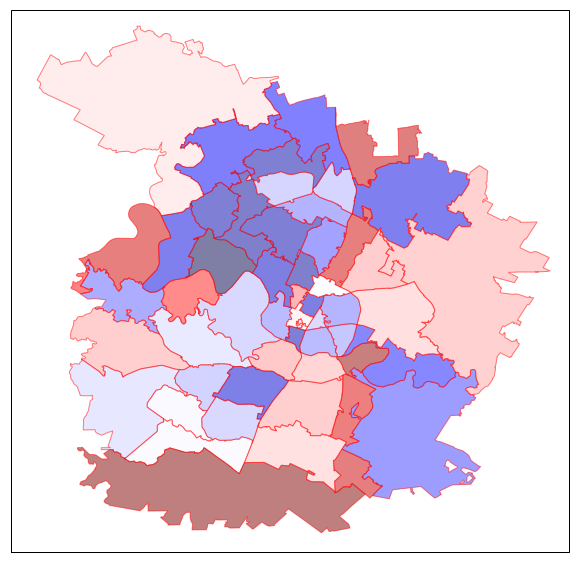

In [110]:
extent = [-98.1, -97.4, 30, 30.68]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.Miller())
ax.set_extent(extent, ccrs.Miller())
ax.add_geometries(geoms, ccrs.Miller(), facecolor=colors, edgecolor='red', alpha=0.5)

In [86]:
from matplotlib import cm

In [90]:
cmap = cm.get_cmap('seismic')

In [91]:
cmap

In [95]:
colors = cmap(gent_score['2011'])